In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
df = pd.read_csv('words.csv', sep=';', names = ["user", "word", "average", "time"])

In [4]:
#Remove bad data (input typos)
df = df[df['user'] != 'None']

In [5]:
df.head(15)

,user,word,average,time
0,axel,tabaco,38.333333,2.245312
1,axel,lana,12.666667,1.476318
2,axel,mala,19.333333,1.350228
3,axel,rumbo,33.400000,2.183524
4,axel,mapa,27.000000,1.633816
5,axel,puso,27.250000,1.714201
6,axel,feo,16.666667,1.597056
7,axel,comadreja,45.555556,2.413517
8,axel,vacuna,23.833333,1.925421
9,axel,virar,24.800000,1.842756


In [6]:
#Calculate length of each word
for index, row in df.iterrows():
    df.loc[index, "length"] = len(row["word"])

In [7]:
df["length"] = df["length"].astype(int)

In [8]:
df.head(10)

,user,word,average,time,length
0,axel,tabaco,38.333333,2.245312,6
1,axel,lana,12.666667,1.476318,4
2,axel,mala,19.333333,1.350228,4
3,axel,rumbo,33.400000,2.183524,5
4,axel,mapa,27.000000,1.633816,4
5,axel,puso,27.250000,1.714201,4
6,axel,feo,16.666667,1.597056,3
7,axel,comadreja,45.555556,2.413517,9
8,axel,vacuna,23.833333,1.925421,6
9,axel,virar,24.800000,1.842756,5


In [9]:
#Change user variable to numeric (axel->0 / martins->1)
for index, row in df.iterrows():
    if(row["user"] == "axel"):
        df.loc[index, "userNum"] = 0
    else:
        df.loc[index, "userNum"] = 1

In [10]:
df['userNum'] = df['userNum'].astype(int)

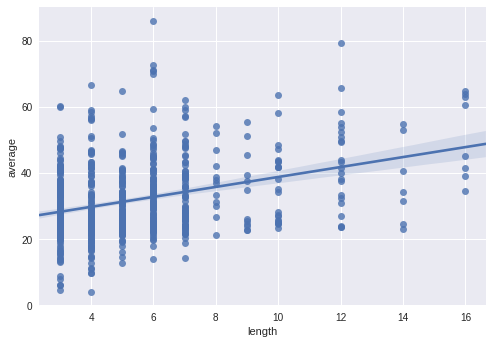

In [11]:
sns.set(color_codes=True)
sns.regplot(x="length", y="average", data=df)

In [12]:
cleandf = df.drop("user", axis=1)
cleandf = cleandf.drop("word", axis=1)

In [13]:
cleandf.head(10)

,average,time,length,userNum
0,38.333333,2.245312,6,0
1,12.666667,1.476318,4,0
2,19.333333,1.350228,4,0
3,33.400000,2.183524,5,0
4,27.000000,1.633816,4,0
5,27.250000,1.714201,4,0
6,16.666667,1.597056,3,0
7,45.555556,2.413517,9,0
8,23.833333,1.925421,6,0
9,24.800000,1.842756,5,0


In [21]:
from sklearn.model_selection import cross_val_score
msk = np.random.rand(len(df)) < 0.8
train = cleandf[msk]
test = cleandf[~msk]
#Train values
X_train = train.drop("userNum", axis=1)
y_train = train["userNum"]
#Test values
X_test = test.drop("userNum", axis=1)
y_test = test["userNum"]

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
sc = scores.mean()
print sc

0.766682754183


In [19]:
pred = clf.predict(X_test)

In [20]:
X_test.head(10)

,average,time,length
15,29.666667,1.612164,3
21,55.454545,2.936632,9
30,46.166667,1.968258,6
36,26.333333,1.474314,3
37,16.666667,1.335844,4
40,11.333333,1.402328,4
55,30.800000,1.939739,6
56,22.600000,2.353584,5
57,22.000000,1.555246,3
61,39.916667,3.893208,12


In [17]:
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [18]:
import cPickle
#Save classifier
with open("classifier.pkl", "wb") as fid:
    cPickle.dump(clf, fid)